In [1]:
# standard data analysis modules
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

from datetime import datetime

from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.ticker as ticker

%matplotlib inline
pd.options.display.max_columns = None

#import datetime

In [2]:
# to read a directory on my PC
import glob

In [3]:
# to take dates from file names and convert currency columns to integers
import re

In [4]:
# to remove items from a list but keep the order
from  more_itertools import unique_everseen

In [5]:
# to prepare the powerpoint presentation
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.enum.text import MSO_ANCHOR
from pptx.enum.dml import MSO_FILL
from pptx.dml.color import RGBColor

In [6]:
# Presentation preperation and image saving

currentyear = 2021 # needed for code later on

# toggle to switch on image saving: 0 = off, 1 = on (i.e.save images and also slide titles)
savePNG = 0

# toggle to switch on powerpoint preparation: 0 = off, 1 = on (automatically saves the images also)
PwrptPrep = 1

# list of slide titles, text and images to add
# monthNow = 'January 2020' this is taken from the latest data uploaded
monthNowTitle = ''
presentationTitle = ['Page Group UK data visualisation', 'Andrew Neville']
saveFileName = 'presentationPrep - michaelpage.pptx'
slideTitle = []
slideText = []
imagePath = []

In [7]:
# list the files in the directory, will use the list of file names to create the Dataframes
files = []
files = glob.glob("C:/Users/andrew/Documents/Big Data Project/Data Collectors/MichaelPage/MichaelPage/michaelpage*.csv")
testLength = len("C:/Users/andrew/Documents/Big Data Project/Data Collectors/MichaelPage/MichaelPage/michaelpageyyyymmdd")
if len(files) == 0:
    files = []
    files = glob.glob("C:/Users/andre/Documents/Big Data Project/Data Collectors/MichaelPage/MichaelPage/michaelpage*.csv")
    testLength = len("C:/Users/andre/Documents/Big Data Project/Data Collectors/MichaelPage/MichaelPage/michaelpageyyyymmdd")
if len(files) == 0:
    files = []
    files = glob.glob("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/MichaelPage/MichaelPage/michaelpage*.csv")
    testLength = len("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/MichaelPage/MichaelPage/michaelpageyyyymmdd")

# eliminate files that are names MichaelPage*.csv where the same file MichaelPage*_cleaned.csv exists
test_to_delete = []

for i in range(len(files)-1):
    if '_cleaned' in files[i].lower():
        pass      
    elif files[i][0:testLength] == files[i+1][0:testLength]:
        test_to_delete.append(files[i])

files = sorted(list(set(files)^set(test_to_delete)),key=str.lower) # need to keep files in order when eliminating the duplicates

print("files to read ", str(len(files)))
print("first file ",files[0])
print("last file ", files[-1])

files to read  250
first file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/MichaelPage/MichaelPage\michaelpage20160807.csv
last file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/MichaelPage/MichaelPage\michaelpage20210730_cleaned.csv


In [8]:
# create DataFrames
# this will create x number of Dataframes from the csv sheets in the files list, df[0] to df[n]

df = []

for i in range(len(files)):
        df.append(pd.read_csv(files[i]))

In [9]:
# ensure all 'ref' columns are dtype object

for i in range(len(df)):
    df[i]['ref'] = df[i]['ref'].astype('object')



In [10]:
df[-1].head()

,title,ref,location,permortemp
0,Market Development Manager - EMEA,jn-072021-2947545,International,Permanent
1,Assembly Operator,jn-062021-2934973,International,Permanent
2,"Associate 1, Private Equity (Infrastructure)",jn-062021-2932615,International,Permanent
3,International Account Manager,jn-062021-2928040,Hitchin,Permanent
4,International Key Account Manager (DIY) Europe,jn-072021-2947490,International,Permanent


In [11]:
total_dataPoints = 0

for i in range(len(df)): 
    total_rows=len(df[i].axes[0])
    total_cols=len(df[i].axes[1])
    total_dataPoints = total_dataPoints + (total_rows*total_cols)

total_dataPoints

8016372

In [12]:
# eliminate all duplicate entries and check for repeat data entries

for i in range(len(df)):
    df[i] = df[i].drop_duplicates(subset=['ref'], keep='first')

repeats = []

for i in range(len(df)):
    repeats.append(len(list(df[i]['ref'])) - len(set(list(df[i]['ref']))))

sum(repeats)

0

In [13]:
# create the michaelpage dataframe

# create an index of dates for use in all dataframes
date = []
for i in range(len(df)):
    date.append((re.search('michaelpage(\d+)', files[i])).group(1)[6:8]+"/"+
(re.search('michaelpage(\d+)', files[i])).group(1)[4:6]+"/"+
(re.search('michaelpage(\d+)', files[i])).group(1)[0:4])

In [14]:
files[0]

'C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/MichaelPage/MichaelPage\\michaelpage20160807.csv'

In [15]:
# create the start of the michaelpage dataFrame
data = {'Date': date}

df_michaelpage = pd.DataFrame(data, columns=['Date'])

In [16]:
# add in the repeats column
# we will move it to the end later

df_michaelpage['repeats'] = repeats

In [17]:
#df_michaelpage
#df_michaelpage.head()
#df_michaelpage.tail()

pd.concat([df_michaelpage.head(5),df_michaelpage.tail(5)])

,Date,repeats
0,07/08/2016,0
1,14/08/2016,0
2,23/08/2016,0
3,29/08/2016,0
4,11/09/2016,0
245,02/07/2021,0
246,09/07/2021,0
247,16/07/2021,0
248,23/07/2021,0
249,30/07/2021,0


In [18]:
last_data = df_michaelpage['Date'][len(df_michaelpage)-1]
monthNow = datetime.strptime(last_data, '%d/%m/%Y').strftime("%d %b %Y")
presentationTitle.append(monthNow)

first_data = datetime.strptime(df_michaelpage['Date'][0], '%d/%m/%Y').strftime("%d %b %Y")

first_data, monthNow

('07 Aug 2016', '30 Jul 2021')

In [19]:
# add total, permanent total and temporary total

total = []
permanent = []
temporary = []

for i in range(len(df)):
    total.append(df[i]['ref'].count())
    permanent.append(df[i][df[i]['permortemp'] == 'Permanent']['ref'].count())
    temporary.append(df[i][df[i]['permortemp'] == 'Temporary']['ref'].count())

df_michaelpage['total'] = total
df_michaelpage['permanent'] = permanent
df_michaelpage['temporary'] = temporary

In [20]:
# add new columns for total new and gone, and for permanent and temporary

totalNew = [0]
totalGone = [0]
permanentNew = [0]
permanentGone = [0]
temporaryNew = [0]
temporaryGone = [0]


for i in range(1,len(df)):
    totalNew.append(len(df[i][~df[i]['ref'].isin(df[i-1]['ref'])]))
    totalGone.append(len(df[i-1][~df[i-1]['ref'].isin(df[i]['ref'])]))
    permanentNew.append(len(df[i][(~df[i]['ref'].isin(df[i-1]['ref'])) & (df[i]['permortemp'] == 'Permanent')]))
    permanentGone.append(len(df[i-1][(~df[i-1]['ref'].isin(df[i]['ref'])) & (df[i-1]['permortemp'] == 'Permanent')]))   
    temporaryNew.append(len(df[i][(~df[i]['ref'].isin(df[i-1]['ref'])) & (df[i]['permortemp'] == 'Temporary')]))
    temporaryGone.append(len(df[i-1][(~df[i-1]['ref'].isin(df[i]['ref'])) & (df[i-1]['permortemp'] == 'Temporary')]))   
        


df_michaelpage['total New'] = totalNew 
df_michaelpage['total Gone'] = totalGone
df_michaelpage['permanent New'] = permanentNew 
df_michaelpage['permanent Gone'] = permanentGone
df_michaelpage['temporary New'] = temporaryNew 
df_michaelpage['temporary Gone'] = temporaryGone

In [21]:
#df_michaelpage
#df_michaelpage.head()
#df_michaelpage.tail()

pd.concat([df_michaelpage.head(5),df_michaelpage.tail(5)])

,Date,repeats,total,permanent,temporary,total New,total Gone,permanent New,permanent Gone,temporary New,temporary Gone
0,07/08/2016,0,14924,12857,2067,0,0,0,0,0,0
1,14/08/2016,0,15109,12986,2123,562,377,463,334,99,43
2,23/08/2016,0,15126,12957,2169,692,675,569,602,123,73
3,29/08/2016,0,15115,12964,2151,340,351,294,286,46,65
4,11/09/2016,0,11218,9645,1573,877,4774,729,4049,148,725
245,02/07/2021,0,5968,4898,1070,435,605,344,506,91,99
246,09/07/2021,0,6050,4950,1100,628,546,501,453,127,93
247,16/07/2021,0,5949,4857,1092,723,824,591,685,132,139
248,23/07/2021,0,6245,5134,1111,759,463,626,352,133,111
249,30/07/2021,0,6308,5197,1111,513,450,423,362,90,88


In [22]:
# create a series of dataframes with new listings

df_new_perm = []
df_new_temp = []


for i in range(1,len(df)):
    #df_new.append(len(df[i][~df[i]['ref'].isin(df[i-1]['ref'])]))
    #totalGone.append(len(df[i-1][~df[i-1]['ref'].isin(df[i]['ref'])]))
    df_new_perm.append(df[i][(~df[i]['ref'].isin(df[i-1]['ref'])) & (df[i]['permortemp'] == 'Permanent')])
    #permanentGone.append(len(df[i-1][(~df[i-1]['ref'].isin(df[i]['ref'])) & (df[i-1]['permortemp'] == 'Permanent')]))   
    df_new_temp.append(df[i][(~df[i]['ref'].isin(df[i-1]['ref'])) & (df[i]['permortemp'] == 'Temporary')])
    #temporaryGone.append(len(df[i-1][(~df[i-1]['ref'].isin(df[i]['ref'])) & (df[i-1]['permortemp'] == 'Temporary')]))   


In [23]:
df_new_perm[-1].head()

,title,ref,location,permortemp
0,Market Development Manager - EMEA,jn-072021-2947545,International,Permanent
5,Senior Designer - Retail,jn-072021-2952860,International,Permanent
6,Accounts Assistant,jn-072021-2948348,International,Permanent
7,Audit & Acounts Senior,14099759,International,Permanent
8,Audit Associate,jn-102020-1238900,International,Permanent


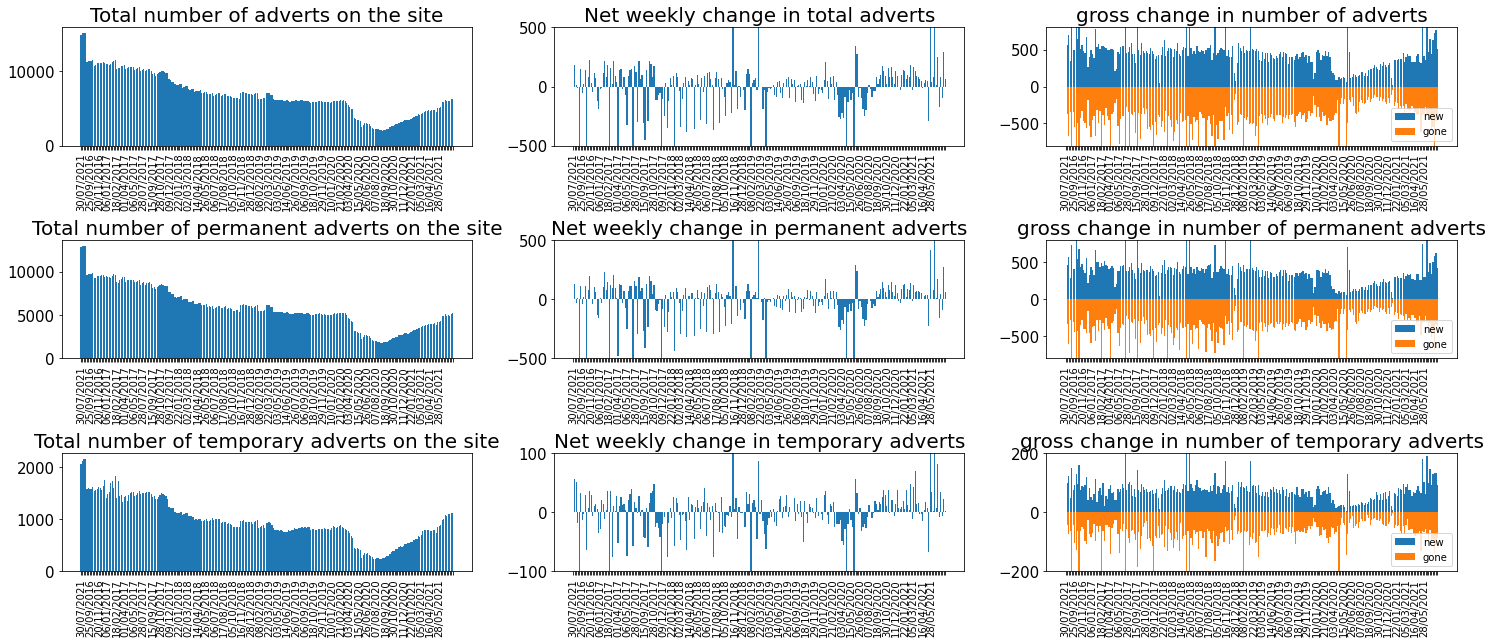

In [24]:
# 9 bar charts showing number of members, net change, gross changes, total / perm / temp

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(25,10))

plt.subplots_adjust(hspace=0.8, wspace=0.2)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_michaelpage.index.values

labels = list(df_michaelpage['Date'])

#prevent x-axis labels from overlapping by printing first, every 5 and last label only
labels = list(df_michaelpage['Date'])
for i in range(5,len(labels),6):
    labels[i], labels[i-1], labels[i-2], labels[i-3], labels[i-4] = '','','','',''

labels[-1], labels[-2], labels[-3], labels[-4] = '','','',''
labels[0] = list(df_michaelpage['Date'])[-1]

y1 = df_michaelpage['total']
ax[0,0].set_title('Total number of adverts on the site', fontsize=20)
ax[0,0].set_xticks(x)
ax[0,0].set_xticklabels(labels, rotation=90, fontsize=10)
ax[0,0].yaxis.set_tick_params(labelsize=15)
ax[0,0].bar(x, y1)

y2 = df_michaelpage['total New'] - df_michaelpage['total Gone']
ax[0,1].set_title('Net weekly change in total adverts', fontsize=20)
ax[0,1].set_xticks(x)
ax[0,1].set_xticklabels(labels, rotation=90, fontsize=10)
ax[0,1].yaxis.set_tick_params(labelsize=15)
ax[0,1].bar(x, y2)
ax[0,1].set_ylim(-500,500)

y3 = df_michaelpage['total New']
y4 = -df_michaelpage['total Gone']
ax[0,2].set_title('gross change in number of adverts', fontsize=20)
ax[0,2].set_xticks(x)
ax[0,2].set_xticklabels(labels, rotation=90, fontsize=10)
ax[0,2].yaxis.set_tick_params(labelsize=15)
ax[0,2].bar(x, y3, label = 'new')
ax[0,2].bar(x, y4, label = 'gone')
ax[0,2].set_ylim(-800,800)
ax[0,2].legend(fontsize=10)

y5 = df_michaelpage['permanent']
ax[1,0].set_title('Total number of permanent adverts on the site', fontsize=20)
ax[1,0].set_xticks(x)
ax[1,0].set_xticklabels(labels, rotation=90, fontsize=10)
ax[1,0].yaxis.set_tick_params(labelsize=15)
ax[1,0].bar(x, y5)

y6 = df_michaelpage['permanent New'] - df_michaelpage['permanent Gone']
ax[1,1].set_title('Net weekly change in permanent adverts', fontsize=20)
ax[1,1].set_xticks(x)
ax[1,1].set_xticklabels(labels, rotation=90, fontsize=10)
ax[1,1].yaxis.set_tick_params(labelsize=15)
ax[1,1].bar(x, y6)
ax[1,1].set_ylim(-500,500)

y7 = df_michaelpage['permanent New']
y8 = -df_michaelpage['permanent Gone']
ax[1,2].set_title('gross change in number of permanent adverts', fontsize=20)
ax[1,2].set_xticks(x)
ax[1,2].set_xticklabels(labels, rotation=90, fontsize=10)
ax[1,2].yaxis.set_tick_params(labelsize=15)
ax[1,2].bar(x, y7, label = 'new')
ax[1,2].bar(x, y8, label = 'gone')
ax[1,2].set_ylim(-800,800)
ax[1,2].legend(fontsize=10)

y9 = df_michaelpage['temporary']
ax[2,0].set_title('Total number of temporary adverts on the site', fontsize=20)
ax[2,0].set_xticks(x)
ax[2,0].set_xticklabels(labels, rotation=90, fontsize=10)
ax[2,0].yaxis.set_tick_params(labelsize=15)
ax[2,0].bar(x, y9)

y6 = df_michaelpage['temporary New'] - df_michaelpage['temporary Gone']
ax[2,1].set_title('Net weekly change in temporary adverts', fontsize=20)
ax[2,1].set_xticks(x)
ax[2,1].set_xticklabels(labels, rotation=90, fontsize=10)
ax[2,1].yaxis.set_tick_params(labelsize=15)
ax[2,1].bar(x, y6)
ax[2,1].set_ylim(-100,100)

y7 = df_michaelpage['temporary New']
y8 = -df_michaelpage['temporary Gone']
ax[2,2].set_title('gross change in number of temporary adverts', fontsize=20)
ax[2,2].set_xticks(x)
ax[2,2].set_xticklabels(labels, rotation=90, fontsize=10)
ax[2,2].yaxis.set_tick_params(labelsize=15)
ax[2,2].bar(x, y7, label = 'new')
ax[2,2].bar(x, y8, label = 'gone')
ax[2,2].set_ylim(-200,200)
ax[2,2].legend(fontsize=10)


if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('michaelpage - adverts and changes.png', bbox_inches = 'tight')
    
    slideTitle.append('Adverts on the site and weekly changes')
    slideText.append('August 2018 to '+ str(monthNow))
    imagePath.append('michaelpage - adverts and changes.png')

plt.show()

In [25]:
# create a new dataframe for year on year charting

In [26]:
data = {'Week': range(0,54)}

df_yoy_total = pd.DataFrame(data, columns=['Week'])
df_yoy_permanent = pd.DataFrame(data, columns=['Week'])
df_yoy_temporary = pd.DataFrame(data, columns=['Week'])

In [27]:
# missing dummy data to fill in

totalExtras0_2017 = [10595]*5
permanentExtras0_2017 = [9054]*5
temporaryExtras0_2017 = [1541]*5
totalExtras1_2017 = [10030]
permanentExtras1_2017 = [8549]
temporaryExtras1_2017 = [1481]

totalExtras0_2018 = [6701]
permanentExtras0_2018 = [5767]
temporaryExtras0_2018 = [903]


In [28]:
column_data_total = []
column_data_permanent = []
column_data_temporary = []
column_data_total=[0]*37
column_data_permanent=[0]*37
column_data_temporary=[0]*37

column_data_total.extend(list(df_michaelpage[(pd.to_datetime(df_michaelpage['Date'], format='%d/%m/%Y')).dt.year == 2016]['total']))
column_data_permanent.extend(list(df_michaelpage[(pd.to_datetime(df_michaelpage['Date'], format='%d/%m/%Y')).dt.year == 2016]['permanent']))
column_data_temporary.extend(list(df_michaelpage[(pd.to_datetime(df_michaelpage['Date'], format='%d/%m/%Y')).dt.year == 2016]['temporary']))

df_yoy_total[2016] = column_data_total
df_yoy_permanent[2016] = column_data_permanent
df_yoy_temporary[2016] = column_data_temporary

for i in range(2017,currentyear+1):
    column_data_total = list(df_michaelpage[(pd.to_datetime(df_michaelpage['Date'], format='%d/%m/%Y')).dt.year == i]['total'])
    column_data_permanent = list(df_michaelpage[(pd.to_datetime(df_michaelpage['Date'], format='%d/%m/%Y')).dt.year == i]['permanent'])
    column_data_temporary = list(df_michaelpage[(pd.to_datetime(df_michaelpage['Date'], format='%d/%m/%Y')).dt.year == i]['temporary'])
    while len(column_data_total) < 54 and i != currentyear:
        column_data_total.append(column_data_total[-1])
        column_data_permanent.append(column_data_permanent[-1])
        column_data_temporary.append(column_data_temporary[-1])
    while len(column_data_total) < 54 and i == currentyear:
        column_data_total.append(0)
        column_data_permanent.append(0)
        column_data_temporary.append(0)    
        

    if i == 2017: # add in the dummy data
        df_yoy_total[i] = column_data_total[0:23] + totalExtras0_2017 \
        + column_data_total[23:31] + totalExtras1_2017 + column_data_total[31:-6]
        df_yoy_permanent[i] = column_data_permanent[0:23] + permanentExtras0_2017 \
        + column_data_permanent[23:31] + permanentExtras1_2017 + column_data_permanent[31:-6]
        df_yoy_temporary[i] = column_data_temporary[0:23] + temporaryExtras0_2017 \
        + column_data_temporary[23:31] + temporaryExtras1_2017 + column_data_temporary[31:-6]
    if i == 2018: # add in the dummy data
        df_yoy_total[i] = column_data_total[0:36] + totalExtras0_2018 + column_data_total[36:-1]
        df_yoy_permanent[i] = column_data_permanent[0:36] + permanentExtras0_2018 + column_data_permanent[36:-1]
        df_yoy_temporary[i] = column_data_temporary[0:36] + temporaryExtras0_2018 + column_data_temporary[36:-1]
    else:
        df_yoy_total[i] = column_data_total
        df_yoy_permanent[i] = column_data_permanent
        df_yoy_temporary[i] = column_data_temporary



In [29]:
#df_yoy_total.head()
#df_yoy_permanent.head()
df_yoy_temporary

,Week,2016,2017,2018,2019,2020,2021
0,0,0,1414,1118,915,799,542
1,1,0,1478,1124,944,825,560
2,2,0,1517,1115,959,863,565
3,3,0,1697,1140,989,858,602
4,4,0,1733,1080,836,839,615
5,5,0,1607,1104,853,853,621
6,6,0,1835,1117,872,863,668
7,7,0,1411,1110,881,879,656
8,8,0,1729,1063,837,854,699
9,9,0,1438,1058,921,834,770


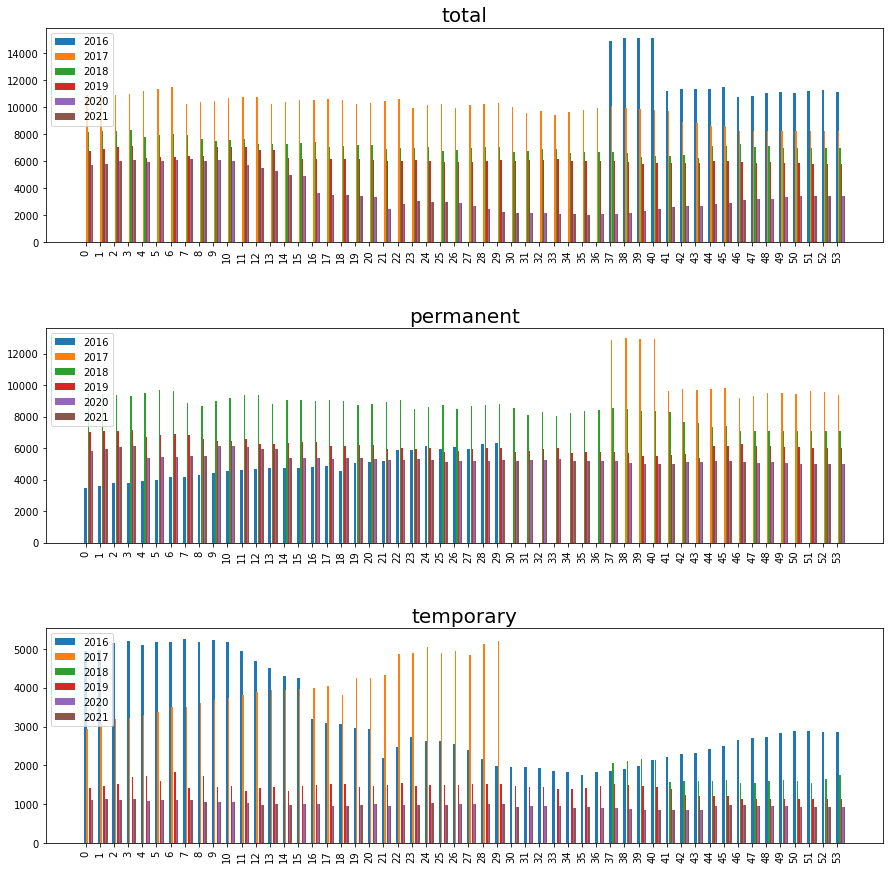

In [30]:
# bar chart showing total, permenant, and temporary yoy

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,15))

plt.subplots_adjust(hspace=0.4, wspace=0.1)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

#x = df_yoyChart_SpSpW['Week'].astype(str)

x = df_yoy_total.index.values

labels = list(df_yoy_total['Week'])

y10 = df_yoy_total[2016]
y11 = df_yoy_total[2017]
y12 = df_yoy_total[2018]
y13 = df_yoy_total[2019]
y14 = df_yoy_total[2020]
y15 = df_yoy_total[2021]



y20 = df_yoy_permanent[2016]
y21 = df_yoy_permanent[2017]
y22 = df_yoy_permanent[2018]
y23 = df_yoy_permanent[2019]
y24 = df_yoy_permanent[2020]
y25 = df_yoy_permanent[2021]


y30 = df_yoy_temporary[2016]
y31 = df_yoy_temporary[2017]
y32 = df_yoy_temporary[2018]
y33 = df_yoy_temporary[2019]
y34 = df_yoy_temporary[2020]
y35 = df_yoy_temporary[2021]


y = [y10,y11,y12,y13,y14,y15,y20,y21,y22,y23,y24,y25,y30,y31,y32,y33,y34,y35]
title = ['total','permanent','temporary']

for i in range(3):
    ax[i].set_title((title[i]), fontsize=20)
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(labels, rotation = 90, fontsize=10)
    #plt[i].yticks(fontsize = 20)
    ax[i].bar(x, y[i*5], width=0.2, label=2016)
    ax[i].bar(x.astype(int) +0.1, y[i*5 +1], width=0.1, label=2017)
    ax[i].bar(x.astype(int) +0.2, y[i*5 +2], width=0.1, label=2018)
    ax[i].bar(x.astype(int) +0.3, y[i*5 +3], width=0.1, label=2019)  
    ax[i].bar(x.astype(int) +0.4, y[i*5 +4], width=0.1, label=2020)
    ax[i].bar(x.astype(int) +0.5, y[i*5 +4], width=0.1, label=2021)
    ax[i].legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    #ax[i].legend()

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('michael page - 3 charts on adverts yoy.png', bbox_inches = 'tight')
    
    slideTitle.append('Adverts on the site yoy')
    slideText.append('August 2016 to '+ str(monthNow))
    imagePath.append('michael page - 3 charts on adverts yoy.png')
    
plt.show()

In [31]:
# create a function that charts the annual columns

def yoy_dataframes_charts(end_year, delta, slide_title, file_path):

    
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,15))

    plt.subplots_adjust(hspace=0.4, wspace=0.1)
    #plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

    x = df_yoy_total.index.values

    labels = list(df_yoy_total['Week'])
    
    y10 = df_yoy_total[end_year-delta]
    y11 = df_yoy_total[end_year]

    y20 = df_yoy_permanent[end_year-delta]
    y21 = df_yoy_permanent[end_year]

    y30 = df_yoy_temporary[end_year-delta]
    y31 = df_yoy_temporary[end_year]

    y = [y10,y11,y20,y21,y30,y31]
    title = ['total','permanent','temporary']

    for i in range(3):
        ax[i].set_title((title[i]), fontsize=20)
        ax[i].set_xticks(x)
        ax[i].set_xticklabels(labels, rotation = 90, fontsize=10)
        #plt[i].yticks(fontsize = 20)
        ax[i].bar(x, y[i*2], width=0.4, label=end_year-delta)
        ax[i].bar(x.astype(int) +0.4, y[i*2 +1], width=0.4, label=end_year)
        ax[i].legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
        #ax[i].legend()

    if savePNG == 1 or PwrptPrep == 1:
        plt.savefig(file_path, bbox_inches = 'tight')

        slideTitle.append(slide_title)
        #slideText.append(str(first_data, ) + ' to ' + str(monthNow))
        slideText.append(' ')
        imagePath.append(file_path)

    plt.show()

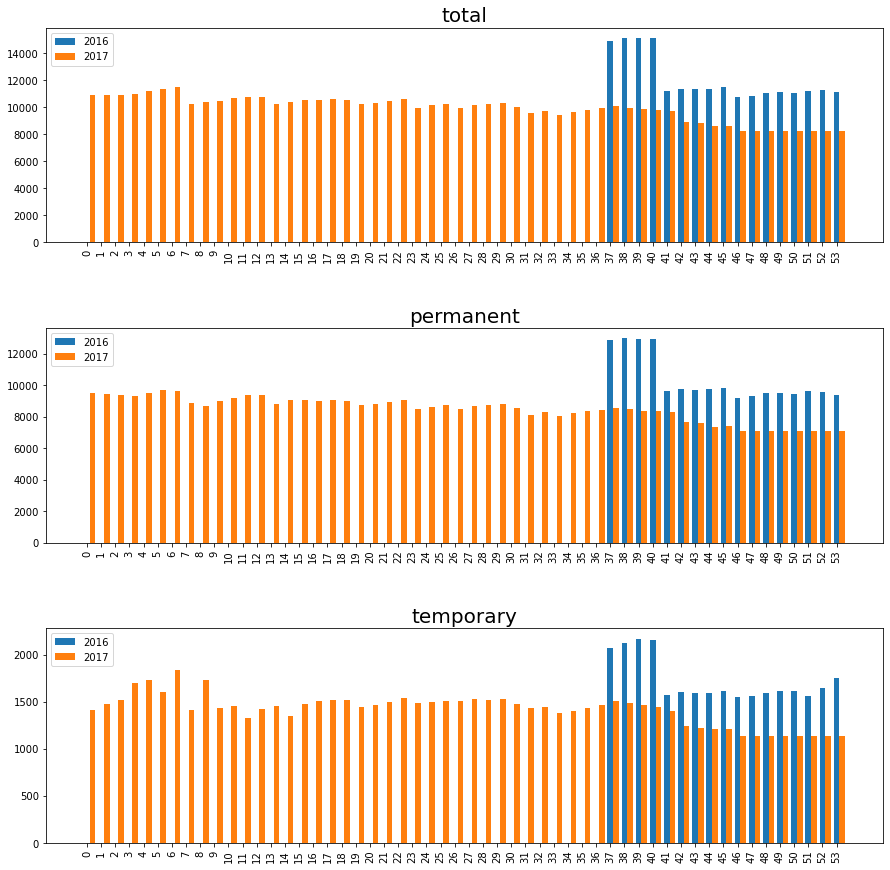

In [32]:
input_year=2017
delta = 1 # compare to the prior year
yoy_dataframes_charts(input_year, delta,'YoY weekly volume of  advert for ' + str(input_year) + ' vs ' + str(input_year-delta),'michael page yoy charts ' + str(input_year) + '.png')

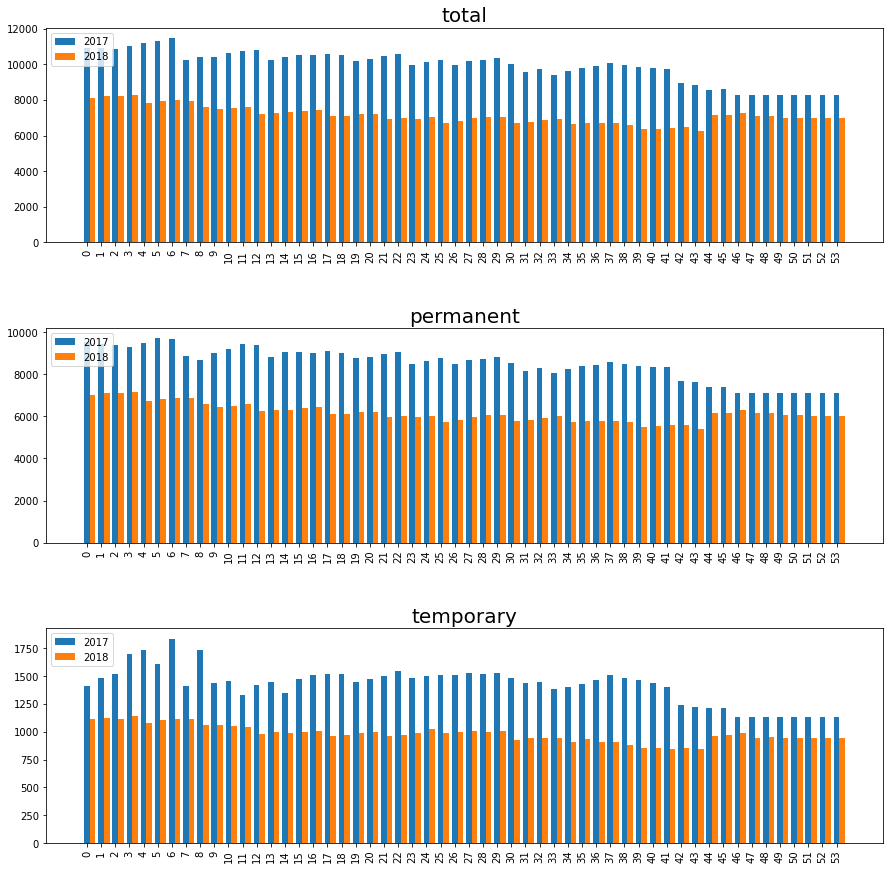

In [33]:
input_year=2018
delta = 1 # compare to the prior year
yoy_dataframes_charts(input_year, delta,'YoY weekly volume of  advert for ' + str(input_year) + ' vs ' + str(input_year-delta),'michael page yoy charts ' + str(input_year) + '.png')

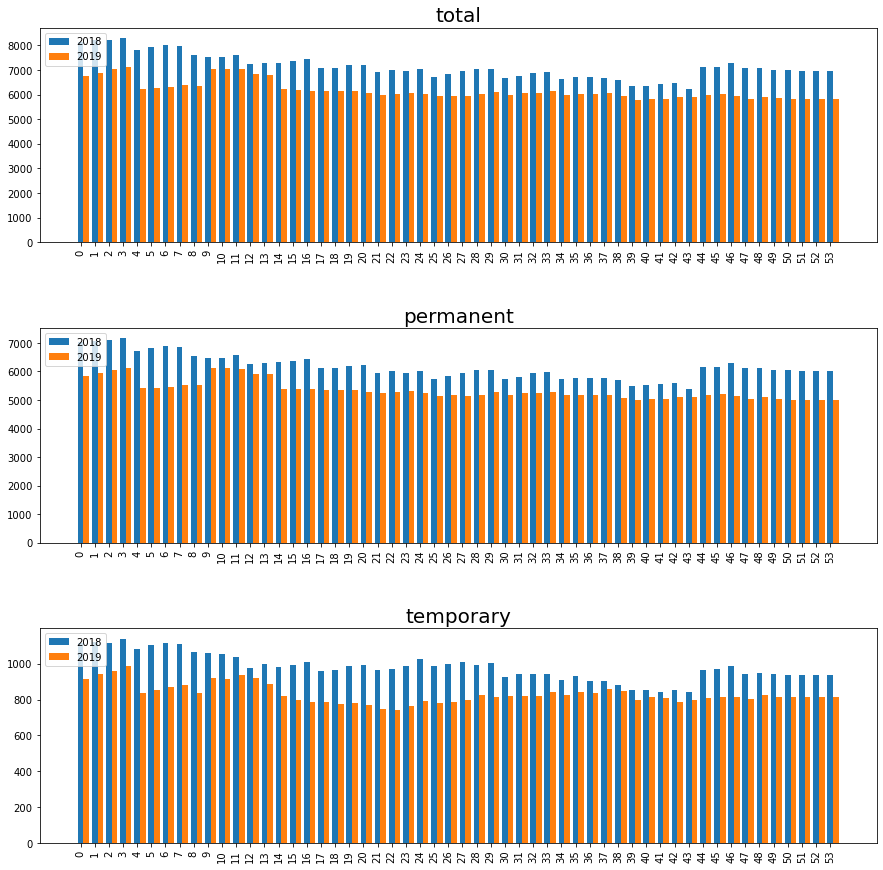

In [34]:
input_year=2019
delta = 1 # compare to the prior year
yoy_dataframes_charts(input_year, delta,'YoY weekly volume of  advert for ' + str(input_year) + ' vs ' + str(input_year-delta),'michael page yoy charts ' + str(input_year) + '.png')

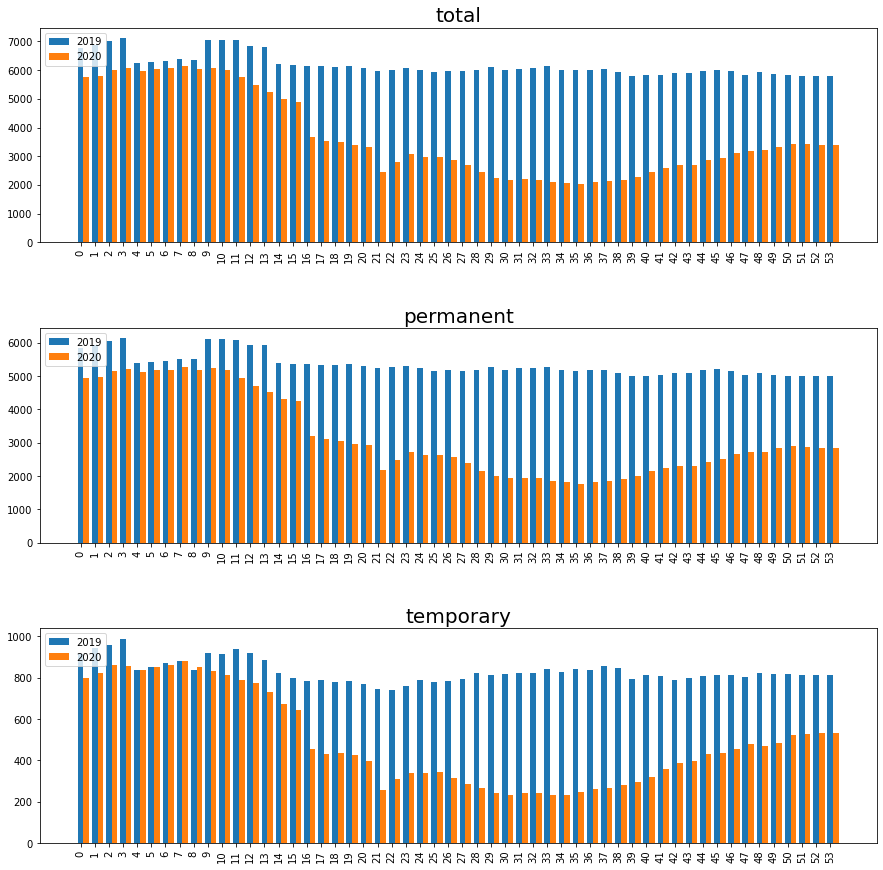

In [35]:
input_year=2020
delta = 1 # compare to the prior year
yoy_dataframes_charts(input_year, delta,'YoY weekly volume of  advert for ' + str(input_year) + ' vs ' + str(input_year-delta),'michael page yoy charts ' + str(input_year) + '.png')

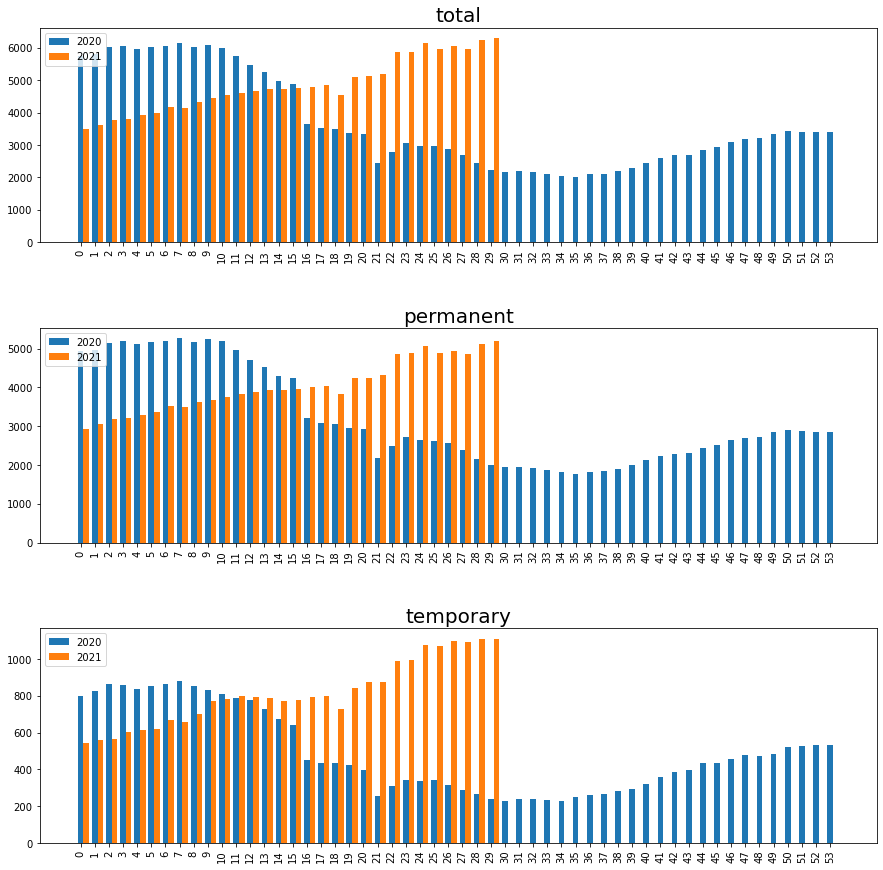

In [36]:
input_year=2021
delta = 1 # compare to the prior year
yoy_dataframes_charts(input_year, delta,'YoY weekly volume of  advert for ' + str(input_year) + ' vs ' + str(input_year-delta),'michael page yoy charts ' + str(input_year) + '.png')

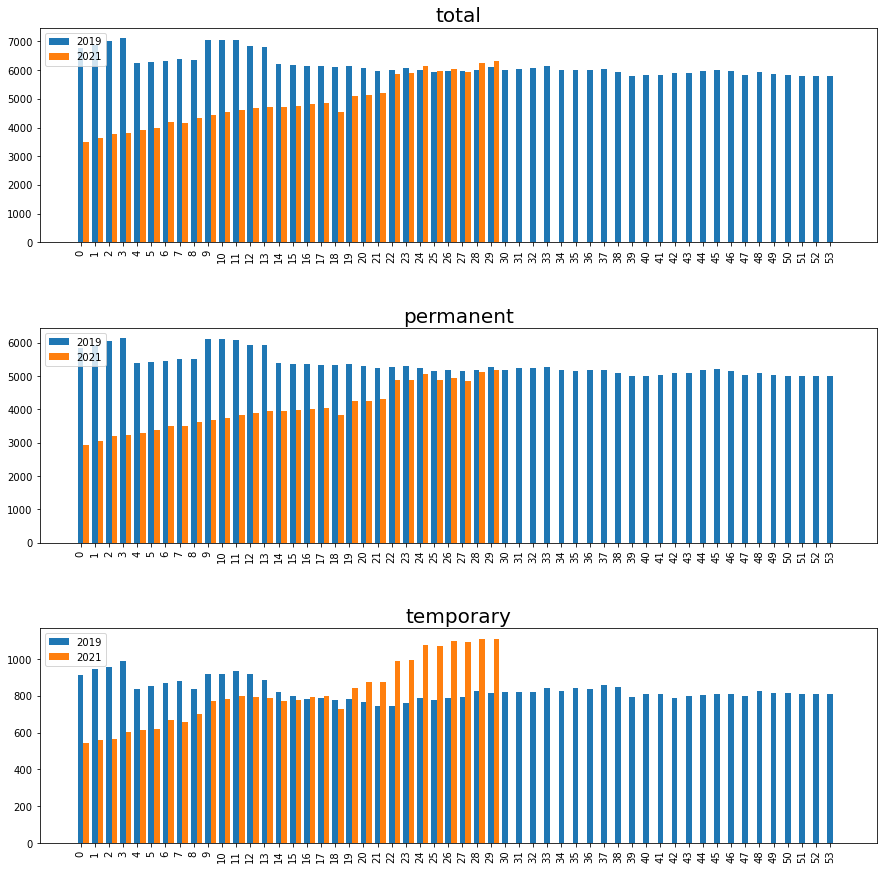

In [37]:
input_year=2021
delta = 2 # compare to the prior year
yoy_dataframes_charts(input_year, delta,'YoY weekly volume of  advert for ' + str(input_year) + ' vs ' + str(input_year-delta),'michael page yoy charts ' + str(input_year) + '.png')

In [38]:
df[-1]['location']

0       International
1       International
2       International
3             Hitchin
4       International
            ...      
7572         West End
7573          England
7585          England
7599          England
7606          England
Name: location, Length: 6308, dtype: object

In [39]:
#
# Preparing the presentation
#

In [40]:
if PwrptPrep == 1:
    prs = Presentation('Presentation - template.pptx')

In [41]:
# change the title and date on the front page
# the slide shapes do not go nicely 0,1,2 they go 1,2,0
if PwrptPrep == 1:
    
    listShapes = [1,2,0]

    for i in range(3):
        slide = prs.slides[0]
        shape = slide.shapes[listShapes[i]]
        text_frame = shape.text_frame
        text_frame.paragraphs[0].runs[0].text = presentationTitle[i]

In [42]:
# add the Preamble and Summary slides
if PwrptPrep == 1:

    title_Preamble_Summary = ['Preamble', 'Summary']

    for i in range(2):
        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = title_Preamble_Summary[i]

        top = height = Inches(1.5)
        width = Inches(10.25)
        left = Inches(0.25)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame
        tf.word_wrap = True
        p = tf.add_paragraph()
        p.level = 1
        if i == 0:
            p.text = 'original data points collected from the Michael Page website is currently ' + '{0:.2f}'.format(total_dataPoints/1000000) + ' million'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'the data is gathered weekly from ' + str(first_data) + ' to '+ str(monthNow)
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'the first five lines of data in the latest weekly download is in the appendix - the data gathered is job title, reference, location and whether Permanent or Temporary'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'initially, before the code is more fully developed we can at least see how the the trend of demand for new Permanent and Temporary jobs are from employers'
            p = tf.add_paragraph()
            p.level = 1
            
        if i == 1:
            p.text = 'to be added by user if required'
            p = tf.add_paragraph()
            p.level = 1

In [43]:
# add the Chapter contents slide and Chapter 1 slide
if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[15]
    slide = prs.slides.add_slide(blank_slide_layout)

    shapes = slide.shapes

    shapes.title.text = 'Contents'

    rows = cols = 2
    left = Inches(0.25)
    top = Inches(1.5)
    width = Inches(1.5)
    height = Inches(1.5)

    table = shapes.add_table(rows, cols, left, top, width, height).table

    # set column widths
    table.columns[0].width = Inches(1.5)
    table.columns[1].width = Inches(2.0)

    tableText = ['01', 'Charts', '02', 'Appendix']
    TableFont = [60, 14, 60, 14]
    tableCell1 = [0,0,1,1]
    tableCell2 = [0,1,0,1]

    for i in range(4):
        table.cell(tableCell1[i], tableCell2[i]).text = tableText[i]
        cell = table.cell(tableCell1[i], tableCell2[i])
        para = cell.text_frame.paragraphs[0]
        para.font.bold = True
        para.font.size = Pt(TableFont[i])
        para.font.color.rgb = RGBColor(0, 55, 129) 
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE
        fill = cell.fill
        fill.background()

    slide = prs.slides.add_slide(prs.slide_layouts[9])
    placeholder = slide.placeholders[1]
    placeholder.text = '01'
    title = slide.shapes.title
    title.text = 'Charts'


In [44]:
# add a blank slide with title, text and saved graphic as per the list of items
if PwrptPrep == 1:
    
    for i in range(len(slideTitle)):

        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = slideTitle[i]

        top = width = height = Inches(1.5)
        left = Inches(0.25)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame

        p = tf.add_paragraph()
        p.text = slideText[i]
        p.font.bold = True
        p.font.size = Pt(14)

        left = Inches(0.25)
        top = Inches(2.5)
        height = Inches(4)
        width = Inches(9)
        pic = slide.shapes.add_picture(imagePath[i], left, top, width = width, height = height)

In [45]:
# add Appendix slide

if PwrptPrep == 1:
    
    slide = prs.slides.add_slide(prs.slide_layouts[9])
    placeholder = slide.placeholders[1]
    placeholder.text = '02'
    title = slide.shapes.title
    title.text = 'Appendix'

In [46]:
# add the 'First 5 lines of the latest upload slide'

if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[15]
    slide = prs.slides.add_slide(blank_slide_layout)

    shapes = slide.shapes

    shapes.title.text = 'First 5 lines of the latest upload ('+str(monthNow)+')'

    rows = cols = 5
    left = Inches(0.25)
    top = Inches(1.5)
    width = Inches(1.5)
    height = Inches(0.25)

    table = shapes.add_table(rows, cols, left, top, width, height).table

    # set column widths
    table.columns[0].width = Inches(0.5)
    table.columns[1].width = Inches(4.0)
    table.columns[2].width = Inches(1.0)
    table.columns[3].width = Inches(2.0)
    table.columns[4].width = Inches(2.0)
    
#     tableText = ['']
    
#     for col in df[-1].columns:
#         tableText.append(col)
        
#     for i in range(25):
#         if i%5 == 0:
#             tableText.append(str(int(i/5)))          
#         tableText.append(str(df[-1].iat[int(i/5), i%5]))

#     for i in range(36):
#         table.cell(int(i/6), i%6).text = tableText[i]
#         cell = table.cell(int(i/6), i%6)
#         para = cell.text_frame.paragraphs[0]
#         if i%6 == 0 or int(i/6) == 0:
#             para.font.bold = True
#         else:
#             para.font.bold = False
#         para.font.size = Pt(10)
#         para.font.color.rgb = RGBColor(0, 0, 0) 
#         cell.vertical_anchor = MSO_ANCHOR.MIDDLE
#         fill = cell.fill
#         fill.background()

    tableText = ['']
    
    for col in df[-1].columns[0:cols-1]:
        tableText.append(col)
        
    for i in range(rows * (cols-1)):
        if i%(cols-1) == 0:
            tableText.append(str(int(i/(cols-1))))          
        tableText.append(str(df[-1].iat[int(i/(cols-1)), i%(cols-1)]))

    for i in range(rows * cols):
        table.cell(int(i/cols), i%cols).text = tableText[i]
        cell = table.cell(int(i/cols), i%cols)
        para = cell.text_frame.paragraphs[0]
        if i%cols == 0 or int(i/cols) == 0:
            para.font.bold = True
        else:
            para.font.bold = False
        para.font.size = Pt(10)
        para.font.color.rgb = RGBColor(0, 0, 0) 
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE
        fill = cell.fill
        fill.background()


In [47]:
# and the 'Code used to gather page'
# and upload the Python, github and Pandas pages

if PwrptPrep == 1:

#     blank_slide_layout = prs.slide_layouts[15]
#     slide = prs.slides.add_slide(blank_slide_layout)
#     shape = slide.shapes[0]
#     text_frame = shape.text_frame
#     p = text_frame.paragraphs[0]
#     r = p.add_run()
#     r.text = 'Code used to gather the Rightmove data '
#     r1 = p.add_run()
#     r1.font.size = Pt(8)
#     r1.text = '(also on my github page)'

    appendixTitleList = ['Appendix: Python Programming Language','Appendix: Github','Appendix: Pandas']
    appensixFileList = ['Presentation - Python Slide.txt','Presentation - Github Slide.txt','Presentation - Pandas Slide.txt']

    for i in range(3):
        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)
        title = slide.shapes.title
        title.text = appendixTitleList[i]
        lines = [line.rstrip('\n') for line in open(appensixFileList[i])]
        top = height = Inches(1.25)
        width = Inches(10.25)
        left = Inches(0.25)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame
        tf.word_wrap = True
        for i in range(len(lines)):
            p = tf.add_paragraph()
            p.level = 1
            if 'https' in lines[i]:
                r = p.add_run()
                r.text = lines[i].split('https')[0]
                r1 = p.add_run()
                r1.text = 'https' + lines[i].split('https')[1]        
                hlink = r1.hyperlink
                hlink.address = r1.text
            else:
                p.text = lines[i]

In [48]:
# add closing slide

if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[40]
    slide = prs.slides.add_slide(blank_slide_layout)

In [49]:
# save completed presentation to file using name diven in the slide name cell
if PwrptPrep == 1:

    prs.save(saveFileName)

In [50]:
#
# all the slide types
# only to be run for reference
#

In [51]:
# prs = Presentation('Persentation - template.pptx')

In [52]:
# for i in range(43):

#     blank_slide_layout = prs.slide_layouts[i]
#     slide = prs.slides.add_slide(blank_slide_layout)

In [53]:
# prs.save('presentationPrep - all the slides.pptx')